In [2]:
import pandas as pd 
from  nltk.corpus import stopwords 

In [20]:
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

In [21]:
Question_data=pd.read_csv("E:\\India_AI\\QAAnalytics.csv")

In [22]:
Question_data.columns

Index(['Candidate_Question', 'Number of Count'], dtype='object')

In [23]:
Question_data["TransformText"]=Question_data["Candidate_Question"].str.lower().str.split()

In [24]:
stop=stopwords.words("english")

In [25]:
Question_data["TransformText"]=Question_data["TransformText"].apply(lambda x:[lem.lemmatize(item) for item in x if item not in stop])

In [29]:
Question_data["TransformText"]=Question_data["TransformText"].apply(lambda x :" ".join(x))

In [30]:
Question_data

,Candidate_Question,Number of Count,TransformText
0,Duration of the hackathon is not sufficient to...,NaN,duration hackathon sufficient code ai solution.
1,"Hey, Please tell what all are necessary to be ...",NaN,"hey, please tell necessary submitted idea phas..."
2,Hackathon is in Bangalore so what is the accom...,NaN,hackathon bangalore accommodation process ?
3,Can I use softwares like IBM watson to impleme...,NaN,use software like ibm watson implement solution?
4,"My idea was selected ,whether we want to come ...",NaN,"idea selected ,whether want come particular zo..."
5,Is the shortlist announced?,NaN,shortlist announced?
6,when will idea phase shortlist announce?,NaN,idea phase shortlist announce?
7,By when the shortlisted teams will be announced?,NaN,shortlisted team announced?
8,By when we will get to know if our idea is sel...,NaN,get know idea selected?
9,When could we expect the shortlist for zonal r...,NaN,could expect shortlist zonal round announced ?...


In [35]:
import re, math
from collections import Counter

WORD = re.compile(r'\w+')

def get_cosine(vec1, vec2):
     intersection = set(vec1.keys()) & set(vec2.keys())
     numerator = sum([vec1[x] * vec2[x] for x in intersection])

     sum1 = sum([vec1[x]**2 for x in vec1.keys()])
     sum2 = sum([vec2[x]**2 for x in vec2.keys()])
     denominator = math.sqrt(sum1) * math.sqrt(sum2)

     if not denominator:
        return 0.0
     else:
        return float(numerator) / denominator

def text_to_vector(text):
     words = WORD.findall(text)
     return Counter(words)

text1 = 'shortlist announced? .'
text2 = 'shortlist announced?'

vector1 = text_to_vector(text1)
vector2 = text_to_vector(text2)

cosine = get_cosine(vector1, vector2)

print(cosine)

0.9999999999999998


In [39]:
counter=Counter(" ".join(Question_data["TransformText"]).split()).most_common(100)


In [47]:
Most_used_DF=pd.DataFrame(counter,columns=["Most_Used_Words","FreqCount"])



In [48]:
Most_used_DF

,Most_Used_Words,FreqCount
0,idea,10
1,hackathon,5
2,accommodation,4
3,?,4
4,ai,3
5,bangalore,3
6,process,3
7,use,3
8,shortlist,3
9,team,3


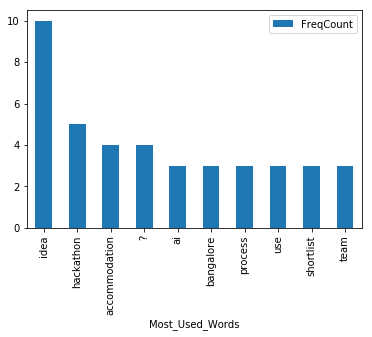

In [51]:
%matplotlib inline

Most_used_DF.head(10).plot( x='Most_Used_Words', y='FreqCount', kind='bar')
